In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [50]:
soil=pd.read_csv("/content/soil_pollution_diseases.csv")

In [51]:
soil.head()

,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
0,CASE_100000,2024-09-12,Africa,Pakistan,Lead,78.04,8.30,35.6,64.9,62.4,...,Sandy,1.98,Gastrointestinal Disease,Moderate,Breathing Difficulty,Adults,Male,Government Regulation,No,Yes
1,CASE_100001,2024-01-01,Africa,Germany,Lead,16.33,7.96,31.0,73.1,8.2,...,Silty,9.71,Cancer,Mild,Breathing Difficulty,Elderly,Both,Community Awareness,Yes,No
2,CASE_100002,2025-02-24,Europe,Germany,Lead,167.33,5.35,16.4,33.8,121.7,...,Clay,5.49,Gastrointestinal Disease,Severe,Nausea,Children,Both,Soil Remediation,Yes,No
3,CASE_100003,2024-09-24,Asia,USA,Lead,89.23,5.66,31.4,30.5,116.9,...,Silty,3.98,Neurological Disorder,Severe,Fatigue,Adults,Male,Community Awareness,Yes,No
4,CASE_100004,2023-05-24,Africa,India,Chromium,93.93,7.64,17.0,58.6,237.0,...,Loamy,0.94,Skin Disease,Moderate,Breathing Difficulty,Children,Female,Government Regulation,Yes,Yes


In [52]:
soil.tail()

,Case_ID,Date_Reported,Region,Country,Pollutant_Type,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,...,Soil_Texture,Soil_Organic_Matter_%,Disease_Type,Disease_Severity,Health_Symptoms,Age_Group_Affected,Gender_Most_Affected,Mitigation_Measure,Case_Resolved,Follow_Up_Required
2995,CASE_102995,2024-04-08,Asia,Mexico,Mercury,14.27,7.06,12.3,75.0,215.6,...,Silty,2.39,Respiratory Issues,Severe,Abdominal Pain,Elderly,Both,Crop Rotation,Yes,Yes
2996,CASE_102996,2024-12-28,Asia,Australia,Pesticides,110.21,5.23,25.4,80.0,184.8,...,Clay,1.91,Neurological Disorder,Severe,Breathing Difficulty,Adults,Female,Government Regulation,Yes,No
2997,CASE_102997,2023-07-15,Europe,India,Chromium,146.15,5.25,35.8,56.0,181.5,...,Silty,8.59,Cancer,Mild,Fatigue,Children,Female,Government Regulation,No,No
2998,CASE_102998,2024-07-30,Asia,USA,Lead,143.18,4.63,20.4,85.3,7.3,...,Silty,5.68,Neurological Disorder,Mild,Abdominal Pain,Adults,Female,Soil Remediation,Yes,Yes
2999,CASE_102999,2024-09-04,North America,China,Cadmium,146.93,6.99,36.6,74.4,276.8,...,Silty,8.30,Respiratory Issues,Mild,Breathing Difficulty,Elderly,Both,Chemical Neutralization,No,No


In [53]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Case_ID                        3000 non-null   object 
 1   Date_Reported                  3000 non-null   object 
 2   Region                         3000 non-null   object 
 3   Country                        3000 non-null   object 
 4   Pollutant_Type                 3000 non-null   object 
 5   Pollutant_Concentration_mg_kg  3000 non-null   float64
 6   Soil_pH                        3000 non-null   float64
 7   Temperature_C                  3000 non-null   float64
 8   Humidity_%                     3000 non-null   float64
 9   Rainfall_mm                    3000 non-null   float64
 10  Crop_Type                      3000 non-null   object 
 11  Farming_Practice               3000 non-null   object 
 12  Nearby_Industry                2418 non-null   o

In [54]:
soil.isnull().sum()

,0
Case_ID,0
Date_Reported,0
Region,0
Country,0
Pollutant_Type,0
Pollutant_Concentration_mg_kg,0
Soil_pH,0
Temperature_C,0
Humidity_%,0
Rainfall_mm,0


In [55]:
soil.columns

Index(['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type',
       'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
       'Humidity_%', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice',
       'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture',
       'Soil_Organic_Matter_%', 'Disease_Type', 'Disease_Severity',
       'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected',
       'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required'],
      dtype='object')

In [56]:
soil.describe()

,Pollutant_Concentration_mg_kg,Soil_pH,Temperature_C,Humidity_%,Rainfall_mm,Soil_Organic_Matter_%
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,102.745587,6.463747,27.225100,58.222867,200.31660,5.175093
std,55.907366,1.166305,10.084577,21.357711,115.27187,2.761633
min,5.030000,4.500000,10.000000,20.000000,0.00000,0.500000
25%,54.425000,5.457500,18.500000,39.900000,100.60000,2.760000
50%,104.085000,6.450000,27.000000,58.450000,199.00000,5.130000
75%,151.472500,7.490000,35.825000,76.800000,299.75000,7.550000
max,199.990000,8.500000,45.000000,95.000000,399.70000,10.000000


In [57]:
soil.shape

(3000, 24)

In [58]:
df = soil.dropna()

In [59]:
df.shape

(2418, 24)

In [60]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

/tmp/ipython-input-2860088044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-2860088044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-2860088044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

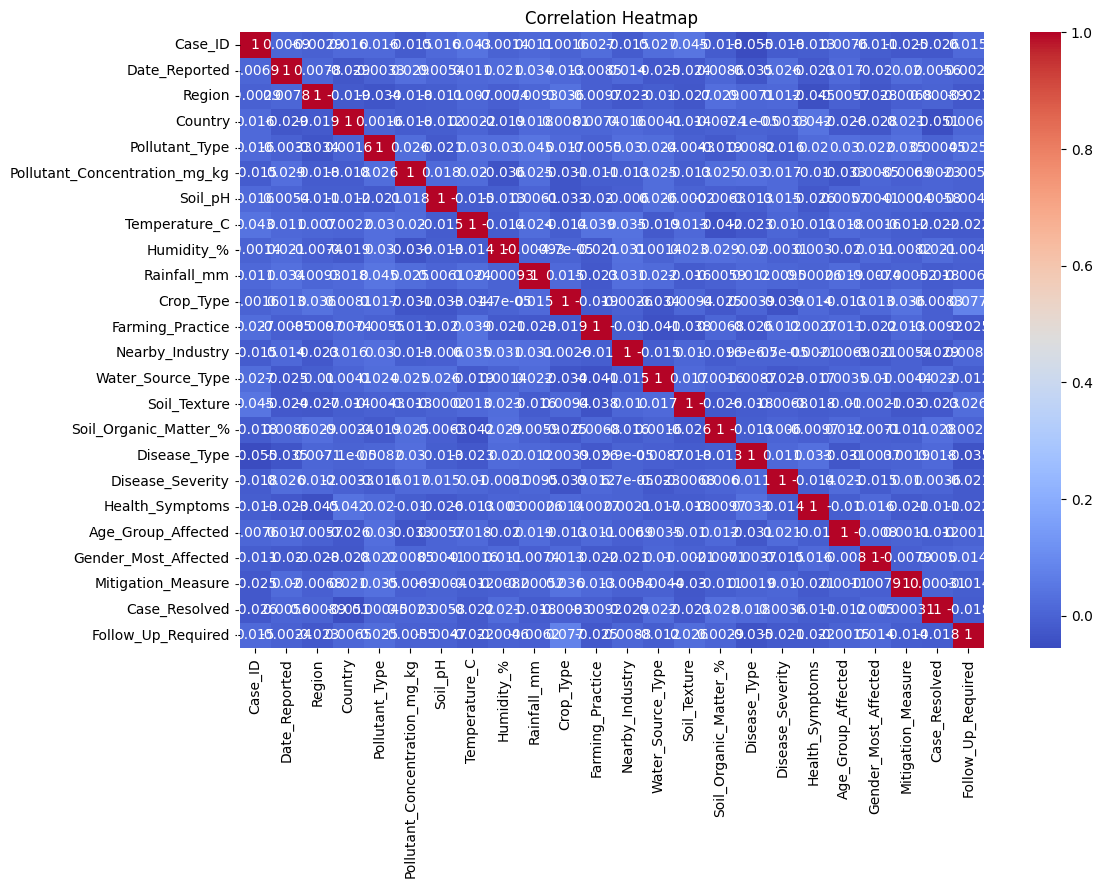

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [62]:
target_column = "Disease_Type"
X = df.drop(target_column, axis=1)
y = df[target_column]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
y_pred = model.predict(X_test)

In [67]:
accuracy_score=accuracy_score(y_test,y_pred)

In [68]:
classification_report=classification_report(y_test,y_pred)

In [69]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.24586776859504134
Confusion Matrix:
 [[35 17 15 13 10]
 [24 25 11 16 17]
 [33 17 21 16 20]
 [29 17 23 15 21]
 [25 17 16  8 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.39      0.30        90
           1       0.27      0.27      0.27        93
           2       0.24      0.20      0.22       107
           3       0.22      0.14      0.17       105
           4       0.25      0.26      0.26        89

    accuracy                           0.25       484
   macro avg       0.25      0.25      0.24       484
weighted avg       0.24      0.25      0.24       484

